# Generating Example Classification Data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# We first need to generate data from two normal distributions.
h = 1
sd = 1
n = 1000

def gen_data(n,h,sd1,sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1,x2,y1,y2)

In [3]:
(x1, x2, y1, y2) = gen_data(1000, 1.5, 1, 1.5)

In [4]:
# Now, we will define a function to plot this data.
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$Y_2$")    

<IPython.core.display.Javascript object>


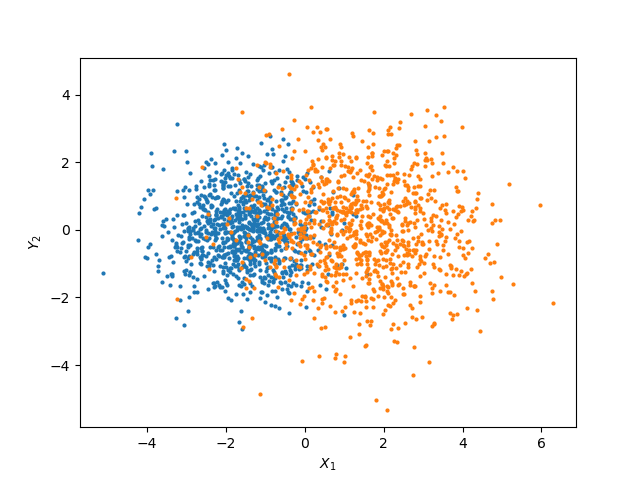

In [5]:
plot_data(x1,y1,x2,y2)

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
# We first set up a classifier object
clf = LogisticRegression()
# The function wants two inputs:
# an x matrix where each row is an observation and each column is a predictor/covaraiate
# a y vector which is basically a list of outcomes, 1 and 2.
# in our case, the x-matrix will be structured as:
# ( X1 Y1 )
# ( X2 Y2 )
# This means we need to use the vstack or hstack methods. 
# This produces the wrong shape - 1000 colums and 2 rows - so we must transpose it
np.vstack((x1,y1)).shape

In [7]:
# This is the correct shape for the x-matrix
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))
X.shape

(2, 1000)

In [8]:
# Our Y outcomes should just be a stack of 1s and 2s
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [15]:
# We then split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
# Fit the model
clf.fit(X_train, y_train)
# And assess its performance
clf.score(X_test, y_test)

0.892

In [17]:
# scikit-learn can also give us estimations of the probabilities 
clf.predict_proba(np.array([-2,0]).reshape(1,-1))
# This tells us that there is a 97% chance that this point belongs to class 1
# and a 2% chance that it belongs to class 2

array([[0.97392639, 0.02607361]])

In [18]:
# We can also ask the model to perform a prediction
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

# Computing Predictive Probabilities Across the Grid

In [19]:
def plot_probs(ax,clf,class_no):
    # we first create a meshgrid running from -5 to +5 in increments of 0.1
    # we then store the output into two variables, xx1 and xx2
    xx1,xx2 = np.meshgrid(np.arange(-5,5,0.1), np.arange(-5,5,0.1))
    # we then turn these into vectors using ravel and stack them, before calling a prediction
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    # in probs we now have the probability for all items, and we extract the rows matching the class number
    Z = probs[:,class_no]
    # we reshape this to be the same as the meshgrid
    Z = Z.reshape(xx1.shape)
    # and then we plot the outcomes at each set of co-ordinates
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.xlabel("$X_2$")

<IPython.core.display.Javascript object>


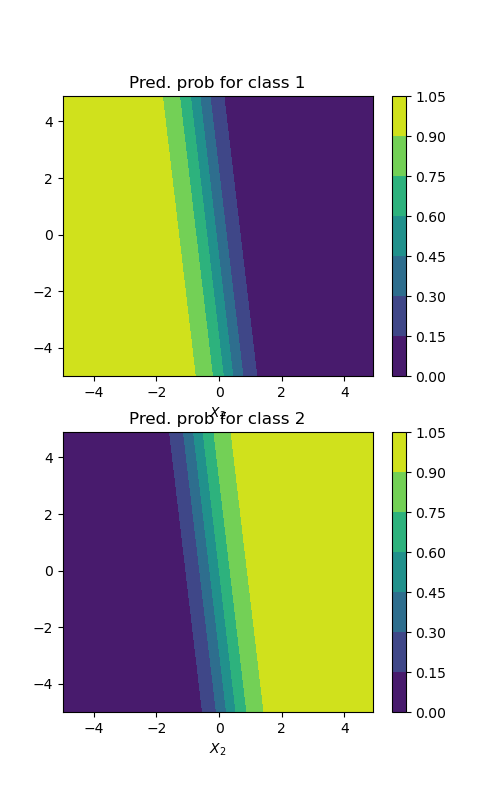

Text(0.5, 1.0, 'Pred. prob for class 2')

In [22]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax,clf,0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax,clf,1)
plt.title("Pred. prob for class 2")